# Findings Summary

**Finding 1**: While the 30% of Private schools decided to go "In-person" in the Fall semester, 40% of the public schools would rather have students study Online. This observation led us to wonder if the university's structure plays a major role in the reopening decision.

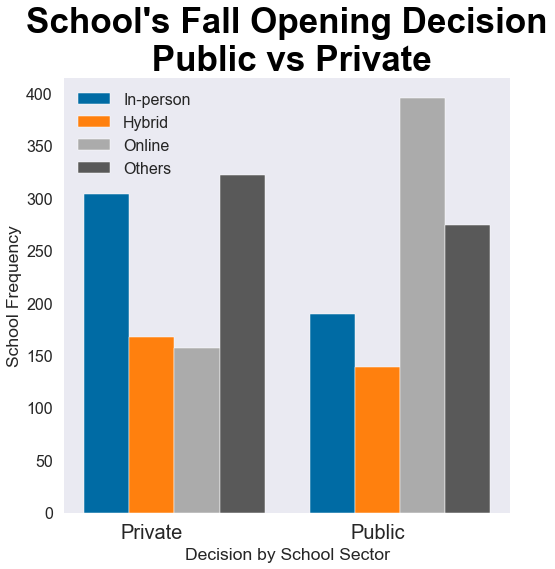

In [56]:
school_control = ["Private","Public"]
school_plan = ["In-person","Hybrid","Online","Others"]
In_person= list(control_groupby[control_groupby.index.isin(["In-person"],level = 1)]["Frequency"])
Hybrid= list(control_groupby[control_groupby.index.isin(["Hybrid"],level = 1)]["Frequency"])
Online= list(control_groupby[control_groupby.index.isin(["Online"],level = 1)]["Frequency"])
Others = [sum(i) for i in zip(list(control_groupby[control_groupby.index.isin(["Other"],level = 1)]["Frequency"]),(list(control_groupby[control_groupby.index.isin(["TBD"],level = 1)]["Frequency"])))]

x=np.arange(len(in_person))
bar_width= 0.2
fig,ax = plt.subplots(figsize = (8,8))
ax.bar(x,In_person,width = bar_width, label = "In-person")
ax.bar(x+bar_width,Hybrid,width = bar_width,label = "Hybrid")
ax.bar(x+bar_width*2,Online,width = bar_width,label = "Online")
ax.bar(x+bar_width*3,Others,width = bar_width,label = "Others")

plt.xticks(x+0.2,school_control,fontsize = 20)
plt.xlabel("Decision by School Sector")
plt.ylabel("School Frequency")
plt.title("School's Fall Opening Decision\n Public vs Private",fontdict = {"fontsize": 35, "color":"black","fontweight":"bold"})
plt.legend(loc = "best")
plt.show()

**Finding 2**: Private institution's fall reopening plan are more leaning toward In-Class option while public institutions have the option to go Online. The observation suggests that institutions, which rely heavily on tuition & expenses revenue, are more likely to plan for In-Class reopening option.

In [ ]:
x=np.arange(len(considering))
bar_width= 0.15
fig,ax = plt.subplots(figsize = (8,8))
ax.bar(x,considering,width = bar_width, color = "red", label = "Considering a range of scenarios")
ax.bar(x+bar_width,in_person,width = bar_width, color = "blue",label = "Planning for in-person")
ax.bar(x+bar_width*2,online,width = bar_width, color = "green",label = "Planning for online")
ax.bar(x+bar_width*3,hybrid,width = bar_width, color = "orange",label = "Proposing a hybrid model")
ax.bar(x+bar_width*4,waiting,width = bar_width, color = "magenta",label = "Waiting to decide")

plt.xticks(x+bar_width*2,["Private","Public"])
plt.xlabel("Decision by school type")
plt.ylabel("School Frequency")
plt.title("School's Fall Opening Decision\n Public vs Private")
plt.legend(loc = "best")
plt.show()

**Finding 3**: Institutions that are not planning for In-Class reopening options tend to be in areas with higher Covid19 total cases. The total death boxplot shows that these institutions are also located in areas with higher total median death, tigher distribution but higher than that of insitutions that are going for In-Class option

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
sns.boxplot(x = "Plan_type",y = "Total_Death",data = df,ax = ax[0])
sns.boxplot(x = "Plan_type",y = "Total_Case",data = df,ax = ax[1])
plt.show()

**Finding 4**: private institution that are planning for options other than In-Class are in better financial health compare to those planning for In-Class.

In [ ]:
sns.boxplot(x = "Plan_type",y = "Financial GPA",data = df_private).set_title("Private Institution Financial Rating")
plt.show()

**Finding 5**: Since the distribution of fall reopening is very skewed toward In-Class in both public and private, we have an imbalance dataset problem that should be handled for better classification modeling

In [ ]:
x=[0,1]
category = ["In-Class","Others"]
fig,axes = plt.subplots(1,2)
axes[0].bar(x,y_public_transf.value_counts().tolist())
axes[1].bar(x,y_private_transf.value_counts().tolist())
plt.setp(axes, xticks=x, xticklabels=category)
axes[0].set_title("Public")
axes[1].set_title("Private")
plt.show()

# EDA code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
sns.set(style = "ticks")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("final_0902_edited.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1947 non-null   int64  
 1   index                                     1947 non-null   int64  
 2   Control                                   1947 non-null   object 
 3   State                                     1947 non-null   object 
 4   Plan                                      1947 non-null   object 
 5   2018 Fall Enrollment                      1947 non-null   float64
 6   Known_Cases_in_County_per_100k_Residents  1947 non-null   int64  
 7   lat                                       1947 non-null   float64
 8   lng                                       1947 non-null   float64
 9   institution                               1947 non-null   object 
 10  Address                             

Let's look at the distribution of schools' plan in the Fall in the dataset

In [4]:
plan_eda = pd.pivot_table(df,index = "Plan",values = "institution", aggfunc = np.count_nonzero)
plan_eda.sort_values("institution",ascending = False,inplace = True)
plan_eda

,institution
Plan,
Online,552
TBD,535
In-person,493
Hybrid,306
Other,61


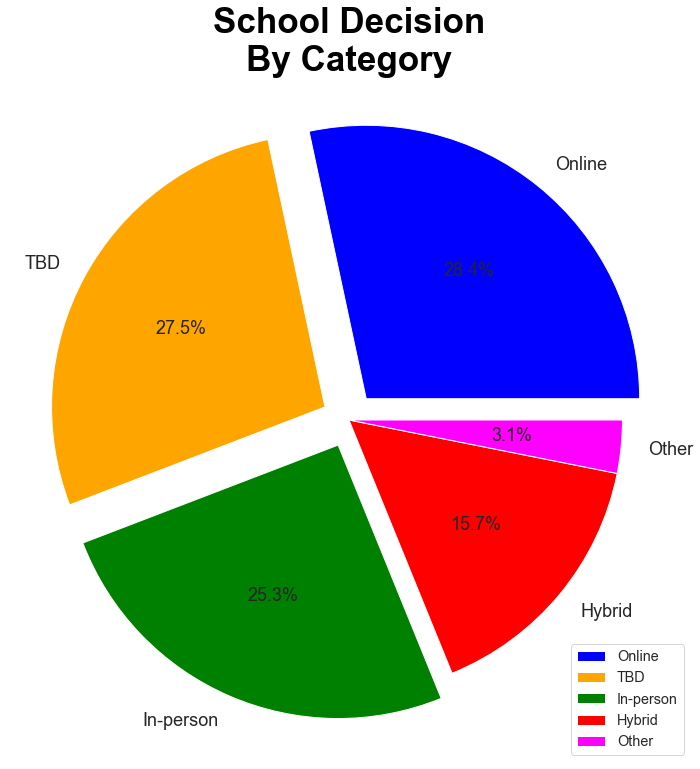

In [5]:
fig,ax = plt.subplots(figsize = (10,30))
explode = [0.1,0.1,0.1,0,0]
textprops = {"fontsize":18}
color = ["blue","orange","green","red","magenta"]
ax.pie(plan_eda["institution"],labels = plan_eda.index,autopct ="%1.1f%%",explode = explode,
      textprops = textprops,radius = 1,colors = color)
ax.set_title("School Decision\nBy Category",fontdict = {"fontsize": 35, "color":"black","fontweight":"bold"})
ax.legend(loc = "lower right",fontsize = "large")
plt.tight_layout()
plt.savefig("School Decision Overview.jpeg",dpi = (200))
plt.show()

Interesting. It looks like the Fall reopening decisions are evenly distributed among 3 primary categories: "In-person", "Online" and "Others". This is a surprising shift compares to the data we collected earlier, which resulted in 85% of institution planning for "In-person" reopening plan.

Let's take a closer look at these schools to see if we can observe any important insight for the analysis

In [6]:
df.groupby(by = ["Control"])["institution"].count()

Control
Private    950
Public     997
Name: institution, dtype: int64

In [7]:
control_groupby = df.groupby(["Control","Plan"]).agg(Frequency = ("Plan_type","count"))
control_groupby["% in Control"] = control_groupby.groupby(level=0).apply(lambda x: 100*x/x.sum())
control_groupby

Frequency  % in Control
Control Plan                              
Private Hybrid           167     17.578947
        In-person        304     32.000000
        Online           157     16.526316
        Other             57      6.000000
        TBD              265     27.894737
Public  Hybrid           139     13.941825
        In-person        189     18.956871
        Online           395     39.618857
        Other              4      0.401204
        TBD              270     27.081244

For private schools, beside from those that did not finalize the reopening decision at the time the data was collected, "In-person" reopening decision was the most popular with over 30% of the universities, followed by Hybrid and Online. On the other hand, in the public sector, almost 40% of college and universities went with "Online" reopening decision. 

This is quite an interesting observation and based on our research, the reason behind the opposition was because institutions in the public sector are mostly 2 years colleges that do not offer housing. Thus, these 2 year colleges will not suffer from the loss in revenue when going online. Another possible explaination is that Public schools are not as vulnerable to tuition revenue as Private schools since they receive funding from the state government.

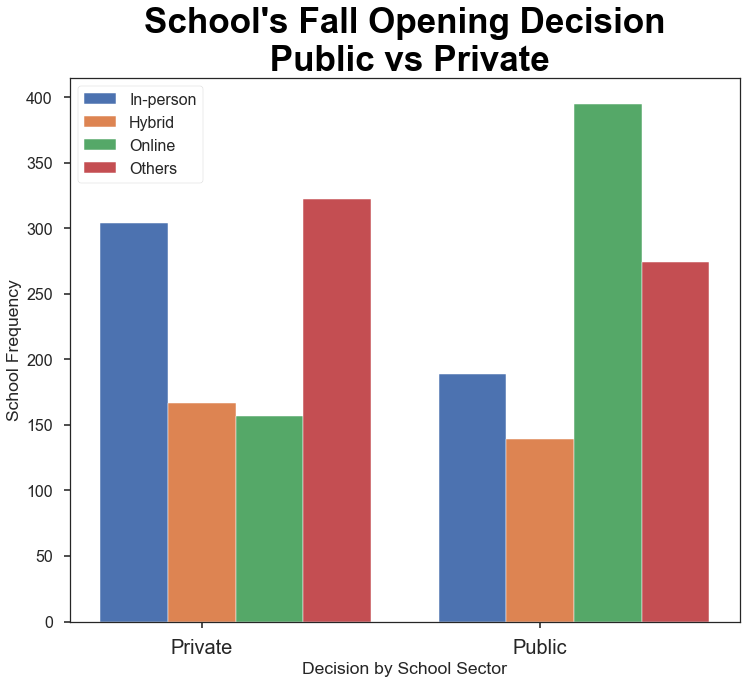

In [10]:
plt.style.use('seaborn-poster')
school_control = ["Private","Public"]
school_plan = ["In-person","Hybrid","Online","Others"]
In_person= list(control_groupby[control_groupby.index.isin(["In-person"],level = 1)]["Frequency"])
Hybrid= list(control_groupby[control_groupby.index.isin(["Hybrid"],level = 1)]["Frequency"])
Online= list(control_groupby[control_groupby.index.isin(["Online"],level = 1)]["Frequency"])
Others = [sum(i) for i in zip(list(control_groupby[control_groupby.index.isin(["Other"],level = 1)]["Frequency"]),(list(control_groupby[control_groupby.index.isin(["TBD"],level = 1)]["Frequency"])))]

x=np.arange(len(In_person))
bar_width= 0.2
fig,ax = plt.subplots(figsize = (12,10))
ax.bar(x,In_person,width = bar_width, label = "In-person")
ax.bar(x+bar_width,Hybrid,width = bar_width,label = "Hybrid")
ax.bar(x+bar_width*2,Online,width = bar_width,label = "Online")
ax.bar(x+bar_width*3,Others,width = bar_width,label = "Others")

plt.xticks(x+0.2,school_control,fontsize = 20)
plt.xlabel("Decision by School Sector")
plt.ylabel("School Frequency")
plt.title("School's Fall Opening Decision\n Public vs Private",fontdict = {"fontsize": 35, "color":"black","fontweight":"bold"})
plt.legend(loc = "best")
plt.show()

The bar plot clearly shows that under Covid19 pandemic, the decision of "Online" Fall reopening is more favorable to public school than private school. This led us to wonder why there is such different in the reopening decision between public and private school. Let's investigate futher.

**Finding 1**: While the 30% of Private schools decided to go "In-person" in the Fall semester, 40% of the public schools would rather have students study Online. This observation led us to wonder if the university's structure plays a major role in the reopening decision.

Let's study these universities' decision closely by control sector to get more insight.

In [11]:
df_public = df[df["Control"]=="Public"]
df_public.groupby(["Plan","college_year"]).agg(Total_count=("institution","count"),Housing_Yes_count = ("Housing",lambda x: (x=="Yes").sum()),Housing_No_count = ("Housing",lambda x: (x=="No").sum()))

Total_count  Housing_Yes_count  Housing_No_count
Plan      college_year                                                  
Hybrid    2                      57                 22                35
          4                      82                 65                17
In-person 2                      74                 40                34
          4                     115                104                11
Online    2                     268                 41               227
          4                     127                 95                32
Other     2                       3                  0                 3
          4                       1                  1                 0
TBD       2                     195                 53               142
          4                      75                 58                17

ah hah, We have something here. Among the public schools that are not going for In-Class decision, most of them are 2 years colleges that do not offer housing for students. This explains for why there are more schools that opt in for online decision because many of them are 2 years community colleges. For those 4 years colleges, the decision is split quite evenly between in-class and online even when they do offer housing for students.

In [12]:
df_public.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"), Cases_per_100k = ("Cases_per_100000","mean"),Percent_of_State_Cases = ("Percent_of_State_Cases","mean"))

Total_count  Cases_per_100k  Percent_of_State_Cases
Plan_type    college_year                                                     
In-class     2                     131     1189.061069                3.289313
             4                     197     1221.131980                5.745178
Not In-Class 2                     466     1304.708155                7.797425
             4                     203     1250.738916                8.353695

In terms of Covid19 severity, although there is only a slight differences, Public schools with in-class decision have lower covid19 cases per 100k resident and percent of state covid19 cases

In [13]:
df_public.groupby(["Plan_type","college_year"]).agg(Average_Total_Population = ("undergraduate_population","mean"), Average_No_of_Faculty= ("total_number_faculty","mean"))

Average_Total_Population  Average_No_of_Faculty
Plan_type    college_year                                                 
In-class     2                          4485.458015             271.633588
             4                         10259.680203             902.314721
Not In-Class 2                          7309.341202             401.092275
             4                         11082.374384             840.714286

Again we can see here that there are differences between the two years colleges when it comes to reoepning decision. Those with not in class option tend to have more student population and faculty members.

In [14]:
df_public.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"),Average_Tution_OutState= ("Tuition_out_state_undergraduate","mean"),Average_Tuition_InState =("Tuition_in_state_undergraduate","mean"))

Total_count  Average_Tution_OutState  \
Plan_type    college_year                                         
In-class     2                     131              8293.566794   
             4                     197             18951.879442   
Not In-Class 2                     466              8606.011803   
             4                     203             17620.814039   

                           Average_Tuition_InState  
Plan_type    college_year                           
In-class     2                         4136.291985  
             4                         8417.347716  
Not In-Class 2                         4306.841202  
             4                         7537.487685

In [15]:
df_public.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"),Average_per_dem=("per_dem","mean"),Average_per_gop=("per_gop","mean"))

Total_count  Average_per_dem  Average_per_gop
Plan_type    college_year                                               
In-class     2                     131         0.355032         0.598007
             4                     197         0.428092         0.516217
Not In-Class 2                     466         0.459035         0.493676
             4                     203         0.498927         0.447698

Interestingly, most public schools either in the 2 or 4 years program decided to go In-class, there are more percentage of voting for republican candidate in the 2016 election.

In [16]:
df_public.groupby(["Plan_type","college_year"]).agg(Average_pct_change_GDP = ("pct_change_gdp_avg","mean"),Average_pct_change_income = ("pct_change_income_avg","mean"))

Average_pct_change_GDP  Average_pct_change_income
Plan_type    college_year                                                   
In-class     2                           0.015818                   0.030131
             4                           0.019173                   0.031797
Not In-Class 2                           0.019089                   0.034333
             4                           0.024883                   0.036804

Average pct change in terms of GDP and income of state where schools decided to go online are higher than that of schools decided to go-inclass

### What about private sector

In [17]:
df_private = df[df["Control"]=="Private"]
df_private.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"),Housing_Yes_count = ("Housing",lambda x: (x=="Yes").sum()),Housing_No_count = ("Housing",lambda x: (x=="No").sum()))

Total_count  Housing_Yes_count  Housing_No_count
Plan_type    college_year                                                  
In-class     2                       3                  2                 1
             4                     468                452                16
Not In-Class 2                      45                 11                34
             4                     434                358                76

In [18]:
df_private.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"), Cases_per_100k = ("Cases_per_100000","mean"),Percent_of_State_Cases = ("Percent_of_State_Cases","mean"))

Total_count  Cases_per_100k  Percent_of_State_Cases
Plan_type    college_year                                                     
In-class     2                       3     1028.000000                4.566667
             4                     468     1260.835470                9.477778
Not In-Class 2                      45     1551.555556               13.042222
             4                     434     1562.753456               11.916129

Those that decided not to go in-class are those with higher case_per_capita and percent of state case

In [19]:
df_private.groupby(["Plan_type","college_year"]).agg(Average_Total_Population = ("undergraduate_population","mean"), Average_No_of_Faculty= ("total_number_faculty","mean"))

Average_Total_Population  Average_No_of_Faculty
Plan_type    college_year                                                 
In-class     2                           602.000000              91.000000
             4                          2156.448718             348.820513
Not In-Class 2                           275.466667              28.200000
             4                          2048.638249             315.979263

In [20]:
df_private.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"),Average_Tution= ("Average_Tuition","mean"),Average_Expense =("Average_Expense","mean"))

Total_count  Average_Tution  Average_Expense
Plan_type    college_year                                              
In-class     2                       3    24712.833333     41423.333333
             4                     468    33059.552885     48083.895833
Not In-Class 2                      45    16490.705556     34870.038889
             4                     434    26111.054724     40747.147657

Those with in-class has significantly higher average_tuition and expenses than that of Not-Inclass

In [21]:
df_private.groupby(["Plan_type","college_year"]).agg(Total_count=("institution","count"),Average_per_dem=("per_dem","mean"),Average_per_gop=("per_gop","mean"))

Total_count  Average_per_dem  Average_per_gop
Plan_type    college_year                                               
In-class     2                       3         0.519702         0.434534
             4                     468         0.475192         0.475350
Not In-Class 2                      45         0.534370         0.421384
             4                     434         0.512854         0.440839

In [25]:
df_private.groupby(["Plan_type","college_year"]).agg(Average_pct_change_GDP = ("pct_change_gdp_avg","mean"),Average_pct_change_income = ("pct_change_income_avg","mean"))

Average_pct_change_GDP  Average_pct_change_income
Plan_type    college_year                                                   
In-class     2                           0.023668                   0.038270
             4                           0.019537                   0.035371
Not In-Class 2                           0.022698                   0.035817
             4                           0.020661                   0.036261

In [28]:
df.columns

Index(['Unnamed: 0', 'index', 'Control', 'State', 'Plan',
       '2018 Fall Enrollment', 'Known_Cases_in_County_per_100k_Residents',
       'lat', 'lng', 'institution', 'Address', 'Campus_Size', 'Housing',
       'Total_All_Undergrad_Grant/Scholarship',
       'AVG_All_Undergrad_Grant/Scholarship', 'Total_Federal_Student_Loans',
       'AVG_Federal_Student_Loans_Amount', 'undergraduate_population',
       'graduate_population', 'total_number_faculty', 'college_year',
       'zipcode', 'city', 'county', 'Tuition_out_state_undergraduate',
       'Tuition_in_state_undergraduate', 'Tuition_In_state_graduate',
       'Tuition_Out_State_Graduate', 'Tuition_fee_graduate_In_State',
       'Tuition_fee_graduate_Out_State', 'Average_Tuition', 'Average_Expense',
       'per_dem', 'per_gop', 'pi_2014', 'pi_2015', 'pi_2016', 'pi_2017',
       'pi_2018', 'gdp_2014', 'gdp_2015', 'gdp_2016', 'gdp_2017', 'gdp_2018',
       'state', 'cases_mar', 'cases_apr', 'cases_may', 'cases_june',
       'cases_july

### Let's do some correlation analysis to see how these variables influence school's decision

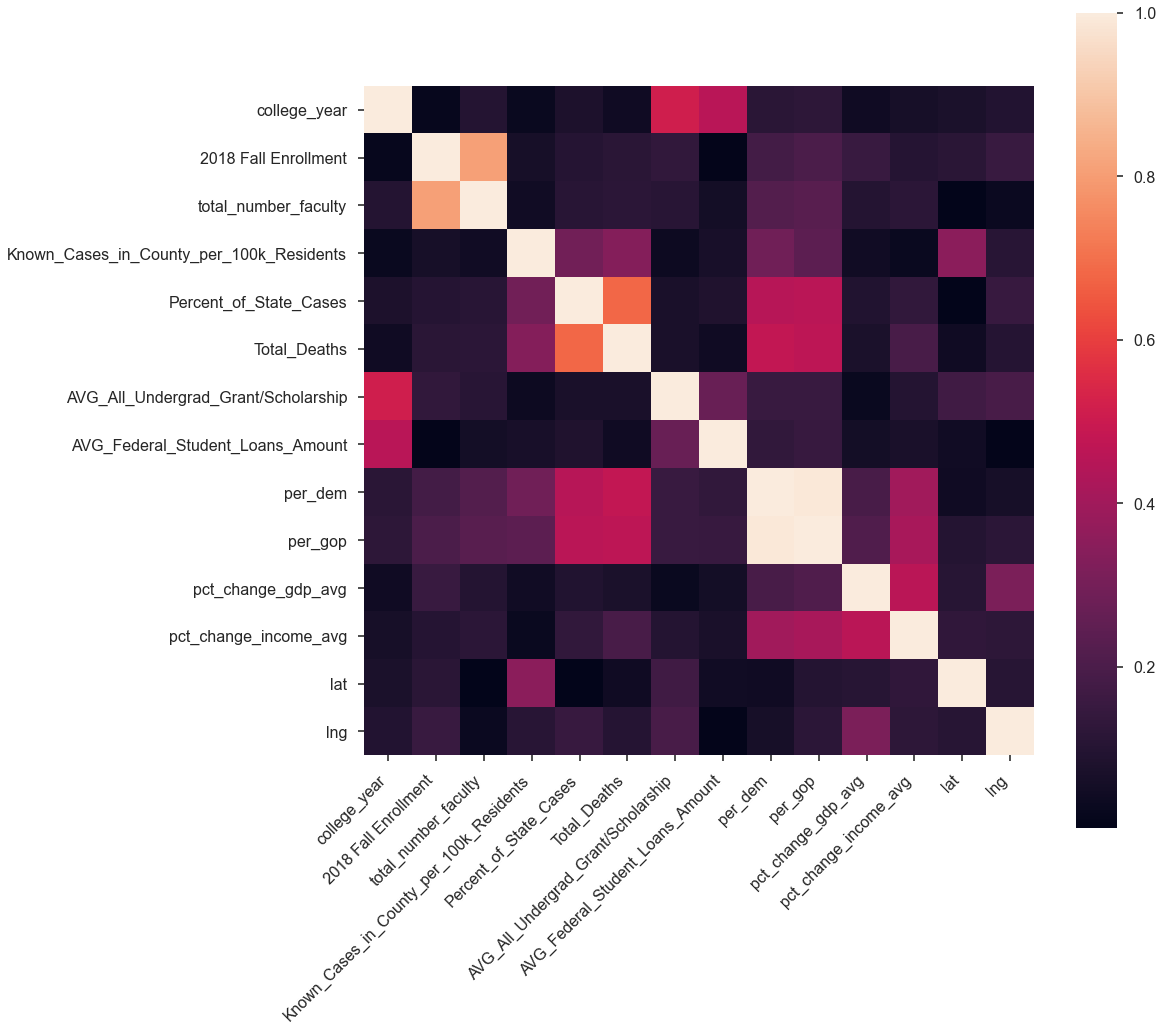

In [31]:
target = ["Plan_type"]
features = [
            'college_year','Campus_Location','Housing', 'Campus_Size', 
            '2018 Fall Enrollment','total_number_faculty',
            'Known_Cases_in_County_per_100k_Residents','Percent_of_State_Cases','Total_Deaths', 
            'AVG_All_Undergrad_Grant/Scholarship','AVG_Federal_Student_Loans_Amount',
            'per_dem', 'per_gop', 
            'pct_change_gdp_avg', 'pct_change_income_avg','lat','lng']
numeric_corr = abs(df[features].select_dtypes(include = "number").corr())
fig,ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(numeric_corr,square=True, xticklabels=True, yticklabels=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()